In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris    #导入数据集iris

  
#载入数据集  
iris = load_iris()  
print(iris.data)         #输出数据集  
print(iris.target)         #输出真实标签 
print(type(iris.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [2]:
#分割训练集与测试集
train_x,test_x,train_y,test_y=train_test_split(iris.data,iris.target)
#将numpy_array数据转换成为tensor
train_x = torch.from_numpy(train_x).type(torch.float32)
train_y = torch.from_numpy(train_y).type(torch.int64)
test_x = torch.from_numpy(test_x).type(torch.float32)
test_y = torch.from_numpy(test_y).type(torch.int64)
#定义batch大小
batch = 8
#对tensor进行打包合并
train_ds = torch.utils.data.TensorDataset(train_x,train_y)
#打乱训练集顺序
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=batch,shuffle=True)

test_ds = torch.utils.data.TensorDataset(test_x,test_y)
#对测试集不需要用乱序避免工作量增加
test_dl = torch.utils.data.DataLoader(test_ds,batch_size=batch)

In [3]:
#定义损失函数
loss_fn = nn.CrossEntropyLoss()
#定义学习率
LR = 0.001
#迭代轮次
epochs = 500
#定义准确率
def accuracy(y_pred,y_true):
    #torch.argmax将数字转换成真正的预测结果
    y_pred = torch.argmax(y_pred,dim=1)
    acc = (y_pred == y_true).float().mean()
    return acc

Parameter containing:
tensor([[-2.9127e-01,  1.3369e-01, -4.2248e-01,  3.1390e-01],
        [ 4.4157e-01, -2.4433e-01, -1.5428e-01, -3.5657e-01],
        [ 1.6681e-01, -4.9847e-01,  4.8374e-01, -2.4851e-01],
        [ 9.5638e-02,  3.0693e-01,  1.4909e-01, -4.8487e-01],
        [-2.2124e-01, -3.4303e-01,  6.6699e-02, -3.7368e-01],
        [ 2.8123e-01, -7.0431e-03,  3.2520e-01, -5.4096e-02],
        [ 2.7776e-05,  2.7986e-01, -4.4378e-01, -4.4394e-01],
        [ 2.4435e-01, -1.4540e-01, -8.1303e-03,  1.5316e-01],
        [ 3.9357e-01, -4.6183e-01,  6.4173e-02, -4.6908e-01],
        [-2.5921e-01,  7.1782e-02, -1.3269e-01,  2.1701e-01],
        [-3.1799e-01, -3.1771e-01,  2.3467e-02, -1.0101e-01],
        [ 3.2372e-01,  4.9305e-01, -1.0911e-01,  3.0425e-01],
        [-2.4016e-01, -4.8075e-01, -1.4316e-01, -3.7839e-01],
        [ 2.4219e-01, -8.3235e-02, -3.2175e-01,  4.5639e-01],
        [-4.6295e-01, -1.7367e-01,  3.5028e-01,  5.2562e-02],
        [ 5.0795e-02, -1.7894e-01, -3.1870e-01, 

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch:  0 train_loss:  1.103 train_accuracy:  0.321 test_loss:  1.104 test_accuracy:  0.395
epoch:  20 train_loss:  1.08 train_accuracy:  0.607 test_loss:  1.081 test_accuracy:  0.553
epoch:  40 train_loss:  1.062 train_accuracy:  0.688 test_loss:  1.065 test_accuracy:  0.605
epoch:  60 train_loss:  1.044 train_accuracy:  0.688 test_loss:  1.051 test_accuracy:  0.605
epoch:  80 train_loss:  1.023 train_accuracy:  0.688 test_loss:  1.037 test_accuracy:  0.605
epoch:  100 train_loss:  0.999 train_accuracy:  0.688 test_loss:  1.02 test_accuracy:  0.605
epoch:  120 train_loss:  0.973 train_accuracy:  0.688 test_loss:  1.002 test_accuracy:  0.605
epoch:  140 train_loss:  0.946 train_accuracy:  0.688 test_loss:  0.982 test_accuracy:  0.605
epoch:  160 train_loss:  0.92 train_accuracy:  0.688 test_loss:  0.963 test_accuracy:  0.605
epoch:  180 train_loss:  0.897 train_accuracy:  0.688 test_loss:  0.945 test_accuracy:  0.605
epoch:  200 train_loss:  0.878 train_accuracy:  0.688 test_loss:  0.9

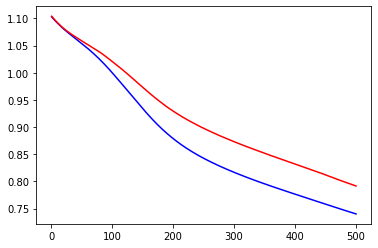

In [4]:
#搭建神经网络
net = nn.Sequential(
    nn.Linear(4, 32),nn.ReLU(),
    nn.Linear(32, 32),nn.ReLU(),
    nn.Linear(32, 3),nn.Softmax()    
)
#创建空数组存储损每次迭代的损失与准确率
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

#梯度下降优化方法
opt_grad = torch.optim.SGD(net.parameters(),lr=LR)

for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        # 梯度置为0
        opt_grad.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        opt_grad.step()
    # 不需要进行梯度计算
    with torch.no_grad():
        epoch_accuracy = accuracy(net(train_x),train_y)
        epoch_loss = loss_fn(net(train_x), train_y).data
        epoch_test_accuracy = accuracy(net(test_x),test_y)
        epoch_test_loss = loss_fn(net(test_x), test_y).data
        if (epoch%20) == 0:
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_accuracy: ',round(epoch_accuracy.item(),3),
                 'test_loss: ',round(epoch_test_loss.item(),3),'test_accuracy: ',round(epoch_test_accuracy.item(),3)
                  )
        train_loss.append(epoch_loss)
        train_acc.append(epoch_accuracy)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_accuracy)
    
        
plt.plot(range(1,epochs+1),train_loss,label='train_loss',c='b')
plt.plot(range(1,epochs+1),test_loss,label='test_loss',c='r')
plt.show()

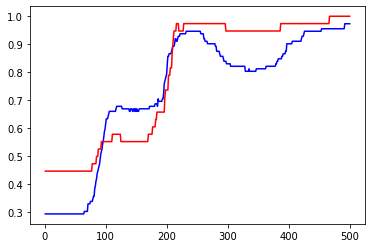

In [5]:
plt.plot(range(1,epochs+1),train_acc,label='train_acc',c='b')
plt.plot(range(1,epochs+1),test_acc,label='test_acc',c='r')
plt.show()

Parameter containing:
tensor([[ 0.3159, -0.3634,  0.0033,  0.4803],
        [-0.4013,  0.4236,  0.0669, -0.4132],
        [ 0.3541, -0.4147, -0.3067,  0.2841],
        [-0.4396, -0.3803,  0.1814,  0.3500],
        [ 0.2292, -0.1221,  0.1981, -0.4359],
        [-0.3507, -0.3826, -0.1830,  0.0627],
        [ 0.3437,  0.0785,  0.0949,  0.1959],
        [-0.2586, -0.3834,  0.1996, -0.1633],
        [ 0.0894, -0.3641,  0.0847, -0.1617],
        [-0.4992,  0.1091, -0.1684, -0.1685],
        [ 0.4546, -0.3371, -0.0008, -0.2407],
        [-0.0772,  0.4234,  0.3169,  0.2824],
        [-0.3979,  0.3410, -0.1406, -0.1541],
        [-0.2517, -0.2812,  0.2654,  0.0940],
        [ 0.2590,  0.1753, -0.4155,  0.0430],
        [ 0.3934, -0.2316,  0.4513,  0.3837],
        [ 0.1338, -0.4097, -0.3306,  0.1116],
        [-0.4800, -0.2928,  0.2656,  0.2987],
        [ 0.1672, -0.3617,  0.1909,  0.0933],
        [ 0.2980, -0.0279,  0.1093, -0.4657],
        [ 0.1010, -0.2453,  0.3333, -0.3111],
        [ 0.

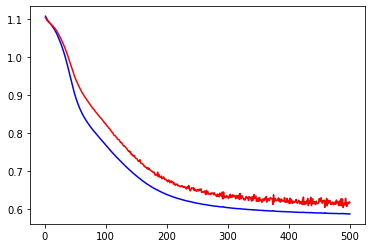

In [5]:
#重新初始化网络
net = nn.Sequential(
    nn.Linear(4, 32),nn.ReLU(),
    nn.Linear(32, 32),nn.ReLU(),
    nn.Linear(32, 3),nn.Softmax()    
)
#数组置空
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
#带动量的梯度下降法
opt_momentum = torch.optim.SGD(net.parameters(),lr=LR,momentum=0.8)
for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        # 梯度置为0
        
        opt_momentum.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        opt_momentum.step()
    # 不需要进行梯度计算
    with torch.no_grad():
        epoch_accuracy = accuracy(net(train_x),train_y)
        epoch_loss = loss_fn(net(train_x), train_y).data
        epoch_test_accuracy = accuracy(net(test_x),test_y)
        epoch_test_loss = loss_fn(net(test_x), test_y).data
        if (epoch%20) == 0:
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_accuracy: ',round(epoch_accuracy.item(),3),
                 'test_loss: ',round(epoch_test_loss.item(),3),'test_accuracy: ',round(epoch_test_accuracy.item(),3)
                  )
        train_loss.append(epoch_loss)
        train_acc.append(epoch_accuracy)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_accuracy)
        
plt.plot(range(1,epochs+1),train_loss,label='train_loss',c='b')
plt.plot(range(1,epochs+1),test_loss,label='test_loss',c='r')
plt.show()

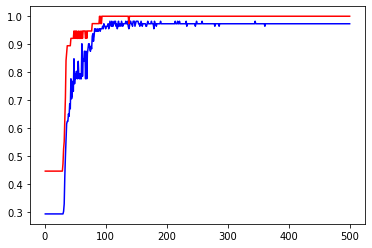

In [9]:
plt.plot(range(1,epochs+1),train_acc,label='train_acc',c='b')
plt.plot(range(1,epochs+1),test_acc,label='test_acc',c='r')
plt.show()